In [7]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# loading the dataset
scaler = 1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array([elem.flatten() / 255. for elem in x_train])
x_test = np.array([elem.flatten() / 255. for elem in x_test])
y_train = np.array([[scaler if i == digit else 0 for i in range(10)] for digit in y_train.flatten()])
y_test = np.array([[scaler if i == digit else 0 for i in range(10)] for digit in y_test.flatten()])

In [3]:
# returns a custom ReLU function with learnable K
all_Ks = []
def get_act():
    val = K.variable(value = 1)
    all_Ks.append(val)
    def custom_activation(x):
        return K.relu(x * val)
    return custom_activation

In [4]:
# creating a model
all_Ks = []
model = Sequential()
model.add(Dense(10, input_shape = (784, ), activation = get_act()))
model.add(Dense(10, input_shape = (784, ), activation = get_act()))
model.add(Dense(10, input_shape = (784, ), activation = get_act()))

# adding K as trainable parameters
model.layers[-1].trainable_weights.extend(all_Ks)

# training the model
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mean_squared_error'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 10000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0963 - acc: 0.1139 - mean_squared_error: 0.0963 - val_loss: 0.0931 - val_acc: 0.1600 - val_mean_squared_error: 0.0931
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0913 - acc: 0.1922 - mean_squared_error: 0.0913 - val_loss: 0.0881 - val_acc: 0.2555 - val_mean_squared_error: 0.0881
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0865 - acc: 0.2953 - mean_squared_error: 0.0865 - val_loss: 0.0835 - val_acc: 0.3597 - val_mean_squared_error: 0.0835
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0821 - acc: 0.3943 - mean_squared_error: 0.0821 - val_loss: 0.0793 - val_acc: 0.4464 - val_mean_squared_error: 0.0793
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0782 - acc: 0.4625 - mean_squared_error: 0.0782 - val_loss: 0.0757 -

60000/60000 [==============================] - 1s 17us/step - loss: 0.0371 - acc: 0.7679 - mean_squared_error: 0.0371 - val_loss: 0.0362 - val_acc: 0.7756 - val_mean_squared_error: 0.0362
Epoch 42/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0364 - acc: 0.7716 - mean_squared_error: 0.0364 - val_loss: 0.0353 - val_acc: 0.7804 - val_mean_squared_error: 0.0353
Epoch 43/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0357 - acc: 0.7754 - mean_squared_error: 0.0357 - val_loss: 0.0347 - val_acc: 0.7822 - val_mean_squared_error: 0.0347
Epoch 44/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0355 - acc: 0.7766 - mean_squared_error: 0.0355 - val_loss: 0.0347 - val_acc: 0.7834 - val_mean_squared_error: 0.0347
Epoch 45/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0354 - acc: 0.7771 - mean_squared_error: 0.0354 - val_loss: 0.0342 - val_acc: 0.7853 - val_mean_squared_error: 0.0342
Epoch 46

Epoch 82/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0298 - acc: 0.8068 - mean_squared_error: 0.0298 - val_loss: 0.0293 - val_acc: 0.8075 - val_mean_squared_error: 0.0293
Epoch 83/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0299 - acc: 0.8056 - mean_squared_error: 0.0299 - val_loss: 0.0295 - val_acc: 0.8065 - val_mean_squared_error: 0.0295
Epoch 84/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0296 - acc: 0.8071 - mean_squared_error: 0.0296 - val_loss: 0.0290 - val_acc: 0.8092 - val_mean_squared_error: 0.0290
Epoch 85/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0292 - acc: 0.8090 - mean_squared_error: 0.0292 - val_loss: 0.0288 - val_acc: 0.8101 - val_mean_squared_error: 0.0288
Epoch 86/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0293 - acc: 0.8084 - mean_squared_error: 0.0293 - val_loss: 0.0290 - val_acc: 0.8078 - val_mean_squared_error: 0.

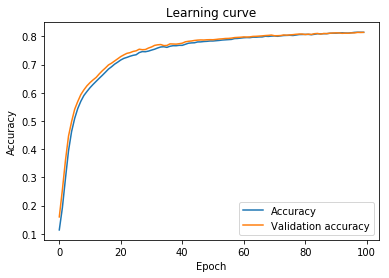

In [9]:
# showing the learning curve
plt.figure()
plt.title('Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'], label = 'Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation accuracy')
plt.legend()
plt.show()

In [5]:
# showing the Lipschitz coefficients K
[K.get_value(x) for x in all_Ks]

[1.2844014, 1.3388152, 1.5721002]